In [38]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from typing import Dict, List, Any

## Pre-processing Data

In [ ]:
# grad_2_data = np.load(glob.glob('./grad_exp@2025-04-21_*/grad_value_n_process_*_n_data_2_*')[0])
# grad_3_data = np.load(glob.glob('./grad_exp@2025-04-21_*/grad_value_n_process_*_n_data_3_*')[0])
# grad_4_data = np.load(glob.glob('./grad_exp@2025-04-21_*/grad_value_n_process_*_n_data_4_*')[0])
# grad_5_data = np.load(glob.glob('./grad_exp@2025-04-21_*/grad_value_n_process_*_n_data_5_*')[0])
# grad_6_data = np.load(glob.glob('./grad_exp@2025-04-21_*/grad_value_n_process_*_n_data_6_*')[0])
# grad_7_data = np.load(glob.glob('./grad_exp@2025-04-21_*/grad_value_n_process_*_n_data_7_*')[0])
# grad_8_data = np.load(glob.glob('./grad_exp@2025-04-21_*/grad_value_n_process_*_n_data_8_*')[0])
# grad_9_data = np.load(glob.glob('./grad_exp@2025-04-21_*/grad_value_n_process_*_n_data_9_*')[0])
# grad_10_data = np.load(glob.glob('./grad_exp@2025-04-21_*/grad_value_n_process_*_n_data_10_*')[0])
# grad_11_data = np.load(glob.glob('./grad_exp@2025-04-22_*/grad_value_n_process_*_n_data_11_*')[0])
# grad_12_data = np.load(glob.glob('./grad_exp@2025-04-25_*/grad_value_n_process_*_n_data_12_*')[0])


# grad_n_data = [grad_2_data,grad_3_data,grad_4_data,grad_5_data,grad_6_data,grad_7_data,grad_8_data,grad_9_data,grad_10_data,grad_11_data,grad_12_data]

# idx = 0
# n_datalist = [2,3,4,5,6,7,8,9,10,11,12]

# grad_n_data_var = []
# for j in range(len(n_datalist)):
#     grad_n_data_var.append(np.var(grad_n_data[j], axis=0)[idx])

## Plot (gradient vs. n)

In [42]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [66]:
n_datalist = [2,3,4,5,6,7,8,9,10,11,12]

grad_n_data_var_diag = [0.00336642, 0.00180237, 0.00096028, 0.00078626, 0.00054299, 0.000491304, 0.00047178, 0.0004574232, 0.0004383713, 0.000398549279, 0.0003883781]

grad_n_data_var_invol = [0.00901369, 0.00454668, 0.00326824, 0.00199853, 0.0015821, 0.00138276, 0.00127, 0.00121883497, 0.0011737198, 0.0010983982, 0.00106473921]

grad_n_data_var_pauli = [0.00994075, 0.00439951, 0.00262885, 0.00143614, 0.0011123, 0.00099015, 0.00090242, 0.00081321786, 0.000734379919, 0.00068758472, 0.0006572686]


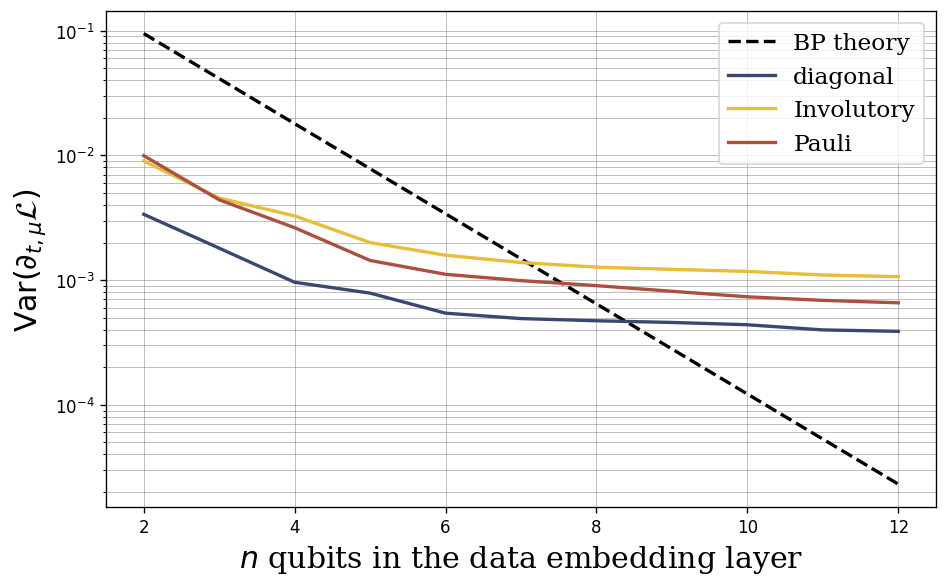

In [70]:
# # Enable LaTeX rendering for all text in the plots
# plt.rcParams['text.usetex'] = False
# plt.rcParams['font.family'] = 'serif'
# # Optionally, specify the LaTeX font if desired (default is Computer Modern)
# plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig = plt.figure(figsize=(8,5), dpi=120)

black = '#000000'
C0 = '#384871'
C1 = '#E7BD39'
C2 = '#AB4F3F'
C3 = '#47855A'

linewidth = 2.0

# Customize title, x-label, and y-label fonts and sizes
label_font = {'fontsize': 18, 'fontname': 'serif'}

x_data = np.array(n_datalist) 
# + np.ceil(np.log2(n_datalist))

plt.gca() 
plt.plot(x_data, 0.5/(2**(1.2*np.array(x_data))), "--", label = f"BP theory", color=black, linewidth = 2.0)
plt.plot(x_data, grad_n_data_var_diag, "-", label = f"diagonal", color = C0, linewidth = linewidth)
# plt.plot(x_data, grad_varphi_diag, "--*", color = C0, linewidth = linewidth)

plt.plot(x_data, grad_n_data_var_invol, "-", label = f"Involutory", color = C1, linewidth = linewidth)
# plt.plot(x_data, grad_varphi_ising, "--*", color = C1, linewidth = linewidth)

plt.plot(x_data, grad_n_data_var_pauli, "-", label = f"Pauli", color = C2, linewidth = linewidth)
# plt.plot(x_data, grad_varphi_rand, "--*", color = C2, linewidth = linewidth)

plt.xlabel(r"$n$ qubits in the data embedding layer", **label_font)
plt.ylabel(r'$\operatorname{Var}(\partial_{t,\mu} \mathcal{L})$', **label_font)
# plt.xlim([1,10])
plt.legend(prop={'size': 14, 'family': 'serif'})
plt.yscale('log')
plt.grid(True, which='both', linestyle='-', linewidth=0.3, color='gray')
plt.tight_layout()
# Save the figure as a PDF file with the specified DPI
plt.savefig('./grad_vs_n/gradient_sampling_vs_n.png', format='png', dpi=600)
plt.show()

#### Loading Data (gradient vs. number of qubits)

In [ ]:
slot_list = [10, 20, 30, 40, 50, 60]

# folder_name = 'grad_exp@2025-04-22_slot_exp'
# exp_title = 'grad'
# param_j = 1

# n_data = 2
# grad_theta_rand_ndata2 = []
# for t_slot in slot_list:
#     t_slot_name = f'{folder_name}/bin/grad_value_n_process_{int(np.ceil(np.log2(n_data)))}_n_data_{n_data}_slot_{t_slot}.npy' 
#     grad_data_slot = np.load(t_slot_name)
#     grad_theta_rand_ndata2.append(np.var(grad_data_slot, axis=0)[param_j])

# n_data = 4
# grad_theta_rand_ndata4 = []
# for t_slot in slot_list:
#     t_slot_name = f'{folder_name}/bin/grad_value_n_process_{int(np.ceil(np.log2(n_data)))}_n_data_{n_data}_slot_{t_slot}.npy'    
#     grad_data_slot = np.load(t_slot_name)
#     grad_theta_rand_ndata4.append(np.var(grad_data_slot, axis=0)[param_j])

# n_data = 6
# grad_theta_rand_ndata6 = []
# for t_slot in slot_list:
#     t_slot_name = f'{folder_name}/bin/grad_value_n_process_{int(np.ceil(np.log2(n_data)))}_n_data_{n_data}_slot_{t_slot}.npy' 
#     grad_data_slot = np.load(t_slot_name)
#     grad_theta_rand_ndata6.append(np.var(grad_data_slot, axis=0)[param_j])

# n_data = 8
# grad_theta_rand_ndata8 = []
# for t_slot in slot_list:
#     t_slot_name = f'{folder_name}/bin/grad_value_n_process_{int(np.ceil(np.log2(n_data)))}_n_data_{n_data}_slot_{t_slot}.npy' 
#     grad_data_slot = np.load(t_slot_name)
#     grad_theta_rand_ndata8.append(np.var(grad_data_slot, axis=0)[param_j])

## Plot (gradient vs. slot)

In [17]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [35]:
grad_theta_rand_ndata2 = [0.00167321, 0.00134707, 0.00108495, 0.00102787, 0.00101423,0.00093725]

grad_theta_rand_ndata4 = [0.00067182, 0.00053864, 0.00047945, 0.00040867, 0.00038004, 0.0003917]

grad_theta_rand_ndata6 = [0.00043485, 0.00035361, 0.0003158 , 0.00029205, 0.00025972, 0.00025085]

grad_theta_rand_ndata8 = [0.00032383, 0.00029394, 0.00026016, 0.00024268, 0.0002278, 0.00022181]

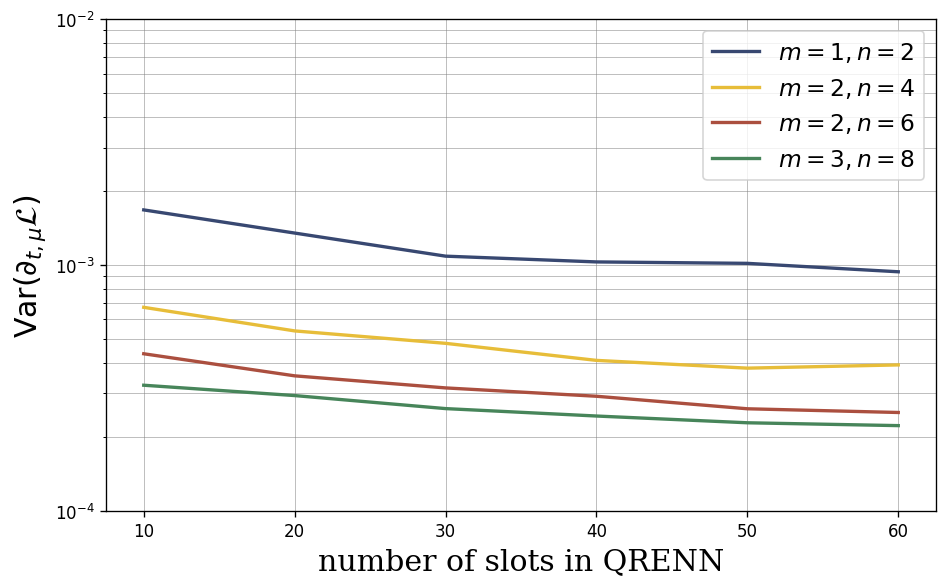

In [37]:
# # Enable LaTeX rendering for all text in the plots
# plt.rcParams['text.usetex'] = False
# plt.rcParams['font.family'] = 'serif'
# # Optionally, specify the LaTeX font if desired (default is Computer Modern)
# plt.rcParams['font.serif'] = ['Computer Modern Roman']

fig = plt.figure(figsize=(8,5), dpi=120)

black = '#000000'
C0 = '#384871'
C1 = '#E7BD39'
C2 = '#AB4F3F'
C3 = '#47855A'

linewidth = 2.0

# Customize title, x-label, and y-label fonts and sizes
label_font = {'fontsize': 18, 'fontname': 'serif'}

x_data = np.array(slot_list) 
# + np.ceil(np.log2(n_datalist))

plt.gca() 
# plt.plot(x_data, (0.5/2**(2*7))*np.ones(len(x_data)), "--", label = f"BP theory", color=black, linewidth = 1.0)
plt.plot(x_data, grad_theta_rand_ndata2, "-", label = r"$m=1,n=2$", color = C0, linewidth = linewidth)

plt.plot(x_data, grad_theta_rand_ndata4, "-", label = r"$m=2,n=4$", color = C1, linewidth = linewidth)

plt.plot(x_data, grad_theta_rand_ndata6, "-", label = r"$m=2,n=6$", color = C2, linewidth = linewidth)

plt.plot(x_data, grad_theta_rand_ndata8, "-", label = r"$m=3,n=8$", color = C3, linewidth = linewidth)

plt.xlabel("number of slots in QRENN", **label_font)
plt.ylabel(r'$\operatorname{Var}(\partial_{t,\mu} \mathcal{L})$', **label_font)
plt.ylim([1e-4,1e-2])
plt.legend(prop={'size': 14, 'family': 'serif'})
plt.yscale('log')
plt.grid(True, which='both', linestyle='-', linewidth=0.3, color='gray')
plt.tight_layout()
# Save the figure as a PDF file with the specified DPI
plt.savefig('./grad_vs_slot/gradient_sampling_vs_slot.png', format='png', dpi=600)
plt.show()